# GelMA only

In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from scipy.stats import sem
import statistics

## Parameters and Data Import

In [4]:
pi = 3.141592653589793238

In [5]:
GelMA31 = pd.read_csv("GelMA31.csv")
GelMA31_H = 5.86
GelMA31_D = 18.61/1000
GelMA31_R = GelMA31_D/2

GelMA32 = pd.read_csv("GelMA32.csv")
GelMA32_H = 5.99
GelMA32_D = 17.83/1000
GelMA32_R = GelMA32_D/2

GelMA33 = pd.read_csv("GelMA33.csv")
GelMA33_H = 6.88
GelMA33_D = 18.01/1000
GelMA33_R = GelMA33_D/2

GelMA34 = pd.read_csv("GelMA34.csv")
GelMA34_H = 7.11
GelMA34_D = 18.39/1000
GelMA34_R = GelMA34_D/2

GelMA35 = pd.read_csv("GelMA35.csv")
GelMA35_H = 6.40
GelMA35_D = 18.38/1000
GelMA35_R = GelMA35_D/2

GelMA_D_Mean = ((GelMA31_D)+(GelMA32_D)+(GelMA33_D)+(GelMA34_D)+(GelMA35_D))/5
GelMA_A_Mean = ((pi*GelMA31_R**2)+(pi*GelMA32_R**2)+ (pi*GelMA33_R**2)+(pi*GelMA34_R**2)+(pi*GelMA35_R**2))/5

In [6]:
GelMA31.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA32.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA33.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA34.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA35.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

In [7]:
GelMA34

,Time [sec],Force [N],Stroke [mm]
0,0.00,0.000636,0.000000
1,0.01,0.000874,0.000000
2,0.02,0.001987,0.000033
3,0.03,0.002384,0.000067
4,0.04,0.002146,0.000133
...,...,...,...
25314,253.14,1.341502,4.219000
25315,253.15,1.341581,4.219133
25316,253.16,1.341740,4.219300
25317,253.17,1.342535,4.219400


## Normalisation bfr stress/strain calculation

In [8]:
GelMA31_cut = GelMA31[~(GelMA31['Force [N]']<= 0.1)]

GelMA32_cut = GelMA32[~(GelMA32['Force [N]']<= 0.1)]

GelMA33_cut = GelMA33[~(GelMA33['Force [N]']<= 0.1)]

GelMA34_cut = GelMA34[~(GelMA34['Force [N]']<= 0.1)]

GelMA35_cut = GelMA35[~(GelMA35['Force [N]']<= 0.1)]

In [10]:
GelMA31_cut['Stroke Normalised'] = GelMA31_cut['Stroke [mm]'] - GelMA31_cut.iloc[0]['Stroke [mm]']

GelMA32_cut['Stroke Normalised'] = GelMA32_cut['Stroke [mm]'] - GelMA32_cut.iloc[0]['Stroke [mm]']

GelMA33_cut['Stroke Normalised'] = GelMA33_cut['Stroke [mm]'] - GelMA33_cut.iloc[0]['Stroke [mm]']

GelMA34_cut['Stroke Normalised'] = GelMA34_cut['Stroke [mm]'] - GelMA34_cut.iloc[0]['Stroke [mm]']

GelMA35_cut['Stroke Normalised'] = GelMA35_cut['Stroke [mm]'] - GelMA35_cut.iloc[0]['Stroke [mm]']


GelMA34_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/1970821808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Stroke Normalised'] = GelMA31_cut['Stroke [mm]'] - GelMA31_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/1970821808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut['Stroke Normalised'] = GelMA32_cut['Stroke [mm]'] - GelMA32_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1

,Time [sec],Force [N],Stroke [mm],Stroke Normalised
2900,29.00,0.100931,0.483300,0.000000
2901,29.01,0.100772,0.483467,0.000167
2908,29.08,0.100692,0.484667,0.001367
2909,29.09,0.101169,0.484833,0.001533
2910,29.10,0.101089,0.485000,0.001700
...,...,...,...,...
25314,253.14,1.341502,4.219000,3.735700
25315,253.15,1.341581,4.219133,3.735833
25316,253.16,1.341740,4.219300,3.736000
25317,253.17,1.342535,4.219400,3.736100


In [20]:
GelMA31_cut['Engineering Strain'] = GelMA31_cut['Stroke Normalised']/ GelMA31_H 
GelMA31_cut['Stress [Pa]'] = GelMA31_cut['Force [N]']/(pi*GelMA31_R**2)

GelMA32_cut['Engineering Strain'] = GelMA32_cut['Stroke Normalised']/ GelMA32_H 
GelMA32_cut['Stress [Pa]'] = GelMA32_cut['Force [N]']/(pi*GelMA32_R**2)

GelMA33_cut['Engineering Strain'] = GelMA33_cut['Stroke Normalised']/ GelMA33_H 
GelMA33_cut['Stress [Pa]'] = GelMA33_cut['Force [N]']/(pi*GelMA33_R**2)

GelMA34_cut['Engineering Strain'] = GelMA34_cut['Stroke Normalised']/ GelMA34_H 
GelMA34_cut['Stress [Pa]'] = GelMA34_cut['Force [N]']/(pi*GelMA34_R**2)

GelMA35_cut['Engineering Strain'] = GelMA35_cut['Stroke Normalised']/ GelMA35_H 
GelMA35_cut['Stress [Pa]'] = GelMA35_cut['Force [N]']/(pi*GelMA35_R**2)




#Before Normalising the data

GelMA31['Engineering Strain'] = GelMA31['Stroke [mm]']/ GelMA31_H 
GelMA31['Stress [Pa]'] = GelMA31['Force [N]']/(pi*GelMA31_R**2)

GelMA32['Engineering Strain'] = GelMA32['Stroke [mm]']/ GelMA32_H 
GelMA32['Stress [Pa]'] = GelMA32['Force [N]']/(pi*GelMA32_R**2)

GelMA33['Engineering Strain'] = GelMA33['Stroke [mm]']/ GelMA33_H 
GelMA33['Stress [Pa]'] = GelMA33['Force [N]']/(pi*GelMA33_R**2)

GelMA34['Engineering Strain'] = GelMA34['Stroke [mm]']/ GelMA34_H 
GelMA34['Stress [Pa]'] = GelMA34['Force [N]']/(pi*GelMA34_R**2)

GelMA35['Engineering Strain'] = GelMA35['Stroke [mm]']/ GelMA35_H 
GelMA35['Stress [Pa]'] = GelMA35['Force [N]']/(pi*GelMA35_R**2)


/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/3353993331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Engineering Strain'] = GelMA31_cut['Stroke Normalised']/ GelMA31_H
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/3353993331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut['Stress [Pa]'] = GelMA31_cut['Force [N]']/(pi*GelMA31_R**2)
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/3353993331.py:4: SettingWithCopyWarning: 


In [19]:
GelMA35_cut

,Time [sec],Force [N],Stroke [mm],Stroke Normalised,Engineering Strain,Stress [Pa]
3802,38.02,0.100295,0.633567,0.000000,0.000000,378.004603
3805,38.05,0.100136,0.634133,0.000567,0.000089,377.405718
3806,38.06,0.100772,0.634267,0.000700,0.000109,379.802010
3807,38.07,0.101646,0.634433,0.000867,0.000135,383.096816
3808,38.08,0.101646,0.634600,0.001033,0.000161,383.096816
...,...,...,...,...,...,...
24654,246.54,2.090533,4.108967,3.475400,0.543031,7879.091283
24655,246.55,2.090693,4.109133,3.475566,0.543057,7879.694313
24656,246.56,2.089580,4.109267,3.475700,0.543078,7875.499484
24657,246.57,2.088229,4.109367,3.475800,0.543094,7870.407647


## Stress and Strain Calculation (NO)

In [13]:
#GelMA31['Engineering Strain'] = GelMA31['Stroke [mm]']/ GelMA31_H 
#GelMA31['Stress [Pa]'] = GelMA31['Force [N]']/(pi*GelMA31_R**2)

#GelMA32['Engineering Strain'] = GelMA32['Stroke [mm]']/ GelMA32_H 
#GelMA32['Stress [Pa]'] = GelMA32['Force [N]']/(pi*GelMA32_R**2)

#GelMA33['Engineering Strain'] = GelMA33['Stroke [mm]']/ GelMA33_H 
#GelMA33['Stress [Pa]'] = GelMA33['Force [N]']/(pi*GelMA33_R**2)

#GelMA34['Engineering Strain'] = GelMA34['Stroke [mm]']/ GelMA34_H 
#GelMA34['Stress [Pa]'] = GelMA34['Force [N]']/(pi*GelMA34_R**2)

#GelMA35['Engineering Strain'] = GelMA35['Stroke [mm]']/ GelMA35_H 
#GelMA35['Stress [Pa]'] = GelMA35['Force [N]']/(pi*GelMA35_R**2)

In [23]:
GelMA35

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa]
0,0.00,-0.001113,0.000000,0.000000,-4.193397
1,0.01,-0.001272,0.000033,0.000005,-4.792455
2,0.02,-0.001113,0.000033,0.000005,-4.193397
3,0.03,-0.001113,0.000067,0.000010,-4.193397
4,0.04,-0.001272,0.000133,0.000021,-4.792455
...,...,...,...,...,...
24654,246.54,2.090533,4.108967,0.642026,7879.091283
24655,246.55,2.090693,4.109133,0.642052,7879.694313
24656,246.56,2.089580,4.109267,0.642073,7875.499484
24657,246.57,2.088229,4.109367,0.642089,7870.407647


## Cutting the Data before normalisation

In [24]:
GelMA31_cut_2 = GelMA31[~(GelMA31['Force [N]']<= 0.1)]

GelMA32_cut_2 = GelMA32[~(GelMA32['Force [N]']<= 0.1)]

GelMA33_cut_2 = GelMA33[~(GelMA33['Force [N]']<= 0.1)]

GelMA34_cut_2 = GelMA34[~(GelMA34['Force [N]']<= 0.1)]

GelMA35_cut_2 = GelMA35[~(GelMA35['Force [N]']<= 0.1)]

In [29]:
GelMA31_cut

,Time [sec],Force [N],Stroke [mm],Stroke Normalised,Engineering Strain,Stress [Pa]
3361,33.61,0.100295,0.560133,0.000000,0.000000,368.718863
3362,33.62,0.100692,0.560300,0.000167,0.000028,370.179846
3369,33.69,0.100374,0.561467,0.001333,0.000228,369.011133
3370,33.70,0.102520,0.561633,0.001500,0.000256,376.899855
3371,33.71,0.104189,0.561800,0.001667,0.000284,383.035322
...,...,...,...,...,...,...
24079,240.79,2.026637,4.013167,3.453034,0.589255,7450.635882
24080,240.80,2.026558,4.013333,3.453200,0.589283,7450.345450
24081,240.81,2.026240,4.013467,3.453334,0.589306,7449.176369
24082,240.82,2.026240,4.013600,3.453467,0.589329,7449.176369


In [30]:
GelMA31_cut_2['Strain Normalised'] = GelMA31_cut_2['Engineering Strain'] - GelMA31_cut_2.iloc[0]['Engineering Strain']

GelMA32_cut_2['Strain Normalised'] = GelMA32_cut_2['Engineering Strain'] - GelMA32_cut_2.iloc[0]['Engineering Strain']

GelMA33_cut_2['Strain Normalised'] = GelMA33_cut_2['Engineering Strain'] - GelMA33_cut_2.iloc[0]['Engineering Strain']

GelMA34_cut_2['Strain Normalised'] = GelMA34_cut_2['Engineering Strain'] - GelMA34_cut_2.iloc[0]['Engineering Strain']

GelMA35_cut_2['Strain Normalised'] = GelMA35_cut_2['Engineering Strain'] - GelMA35_cut_2.iloc[0]['Engineering Strain']

GelMA35_cut_2

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/2462703653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut_2['Strain Normalised'] = GelMA31_cut_2['Engineering Strain'] - GelMA31_cut_2.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/2462703653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut_2['Strain Normalised'] = GelMA32_cut_2['Engineering Strain'] - GelMA32_cut_2.iloc[0]['Engineering Strain']
/var/folders/97/y1n8

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stroke Normalised,Strain Normalised
3802,38.02,0.100295,0.633567,0.098995,378.004603,0.000000,0.000000
3805,38.05,0.100136,0.634133,0.099083,377.405718,0.000567,0.000089
3806,38.06,0.100772,0.634267,0.099104,379.802010,0.000700,0.000109
3807,38.07,0.101646,0.634433,0.099130,383.096816,0.000867,0.000135
3808,38.08,0.101646,0.634600,0.099156,383.096816,0.001033,0.000161
...,...,...,...,...,...,...,...
24654,246.54,2.090533,4.108967,0.642026,7879.091283,3.475400,0.543031
24655,246.55,2.090693,4.109133,0.642052,7879.694313,3.475566,0.543057
24656,246.56,2.089580,4.109267,0.642073,7875.499484,3.475700,0.543078
24657,246.57,2.088229,4.109367,0.642089,7870.407647,3.475800,0.543094


In [26]:
GelMA31_cut_2['Stroke Normalised'] = GelMA31_cut_2['Stroke [mm]'] - GelMA31_cut_2.iloc[0]['Stroke [mm]']

GelMA32_cut_2['Stroke Normalised'] = GelMA32_cut_2['Stroke [mm]'] - GelMA32_cut_2.iloc[0]['Stroke [mm]']

GelMA33_cut_2['Stroke Normalised'] = GelMA33_cut_2['Stroke [mm]'] - GelMA33_cut_2.iloc[0]['Stroke [mm]']

GelMA34_cut_2['Stroke Normalised'] = GelMA34_cut_2['Stroke [mm]'] - GelMA34_cut_2.iloc[0]['Stroke [mm]']

GelMA35_cut_2['Stroke Normalised'] = GelMA35_cut_2['Stroke [mm]'] - GelMA35_cut_2.iloc[0]['Stroke [mm]']


GelMA34_cut_2

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/1298837268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA31_cut_2['Stroke Normalised'] = GelMA31_cut_2['Stroke [mm]'] - GelMA31_cut_2.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_1318/1298837268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA32_cut_2['Stroke Normalised'] = GelMA32_cut_2['Stroke [mm]'] - GelMA32_cut_2.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stroke Normalised
2900,29.00,0.100931,0.483300,0.067975,379.987303,0.000000
2901,29.01,0.100772,0.483467,0.067998,379.389069,0.000167
2908,29.08,0.100692,0.484667,0.068167,379.089765,0.001367
2909,29.09,0.101169,0.484833,0.068190,380.885217,0.001533
2910,29.10,0.101089,0.485000,0.068214,380.585912,0.001700
...,...,...,...,...,...,...
25314,253.14,1.341502,4.219000,0.593390,5050.541972,3.735700
25315,253.15,1.341581,4.219133,0.593408,5050.839395,3.735833
25316,253.16,1.341740,4.219300,0.593432,5051.438004,3.736000
25317,253.17,1.342535,4.219400,0.593446,5054.431053,3.736100


### Plotting Force and Stroke Normalised 

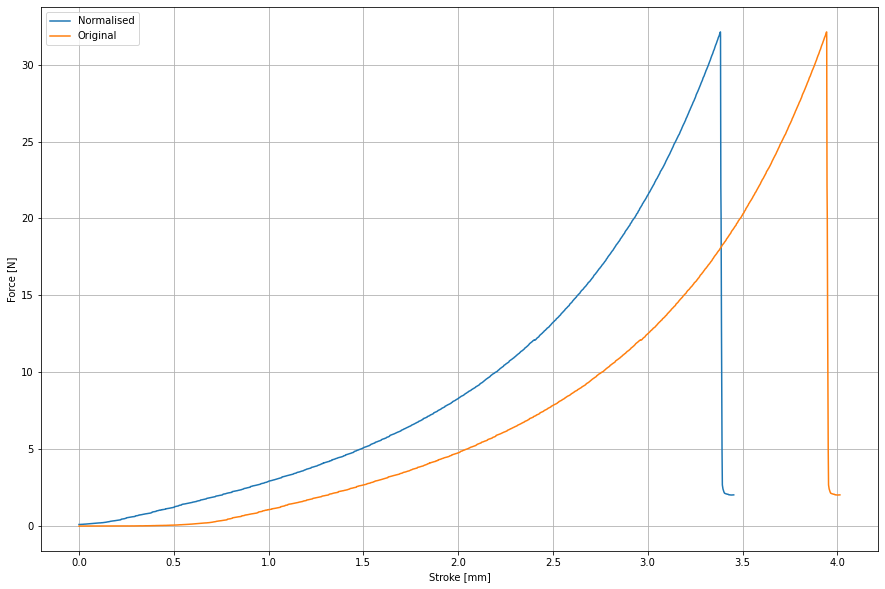

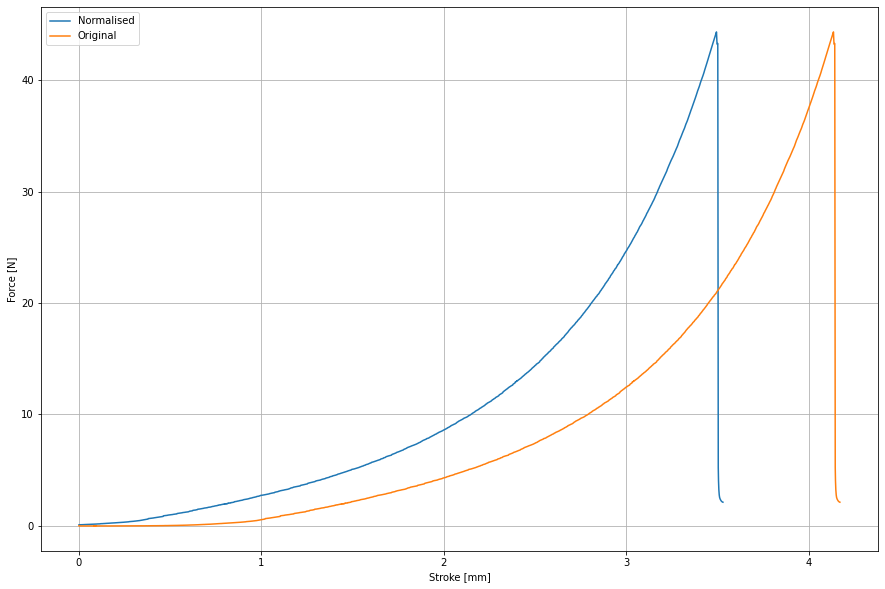

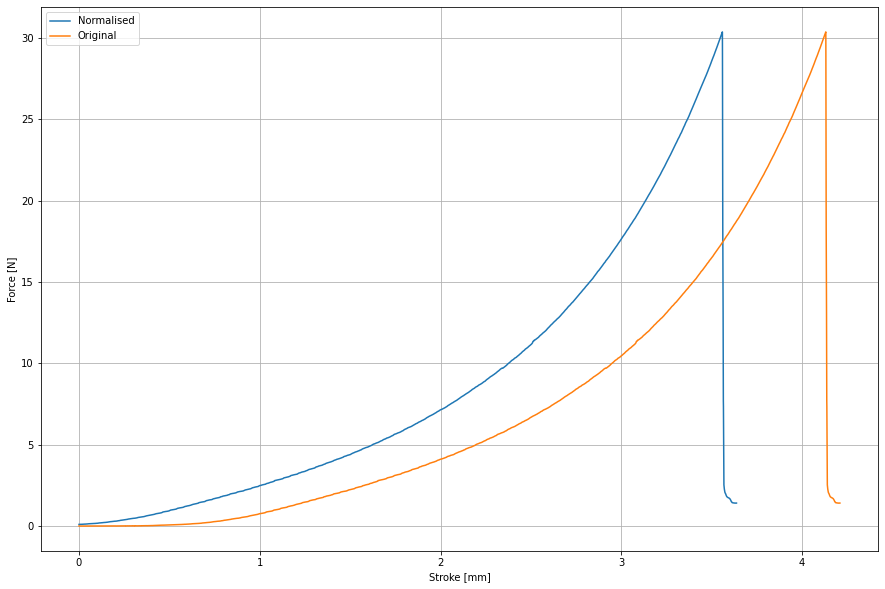

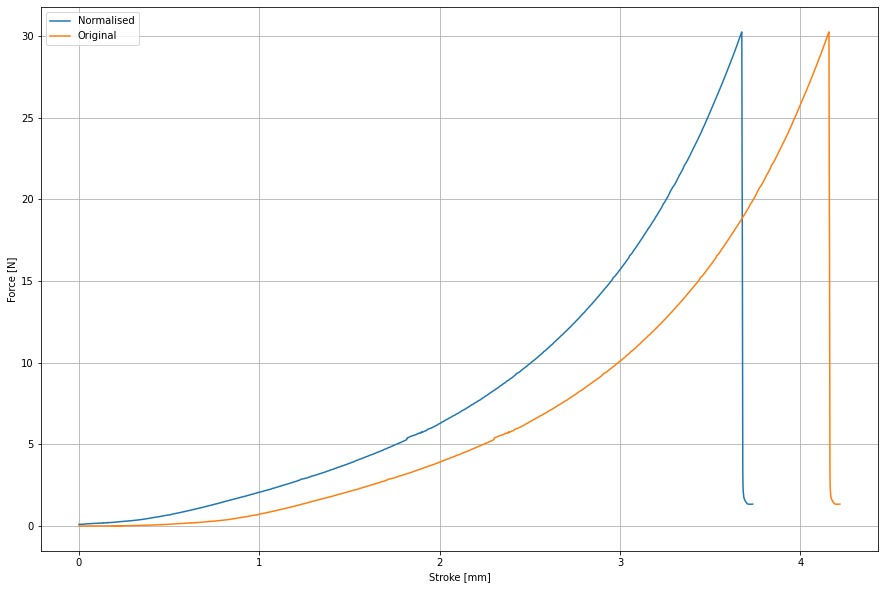

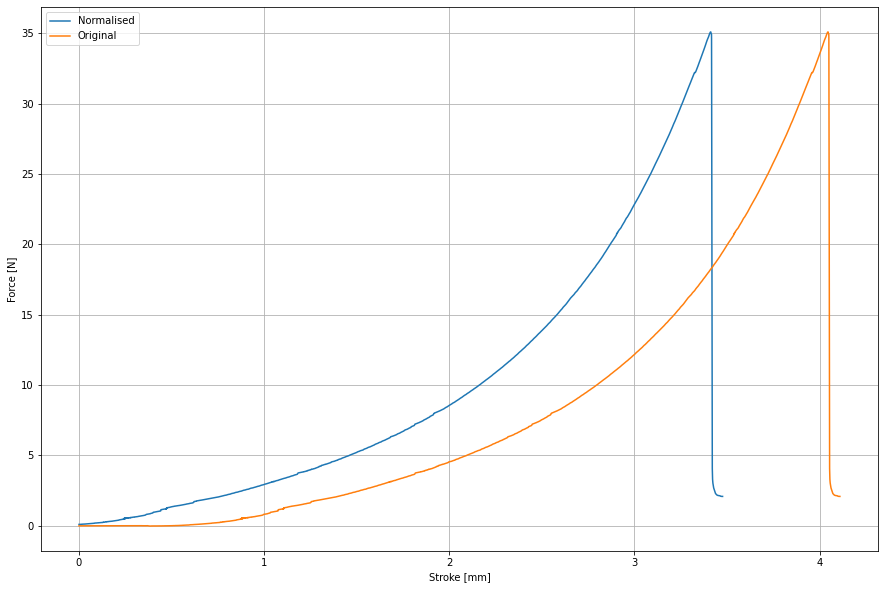

In [28]:
axA = GelMA31_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA31.plot(ax = axA, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()


axB = GelMA32_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA32.plot(ax = axB, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axC = GelMA33_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA33.plot(ax = axC, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axD = GelMA34_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA34.plot(ax = axD, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axE = GelMA35_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA35.plot(ax = axE, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


### Plotting Stress and Strain Normalised 

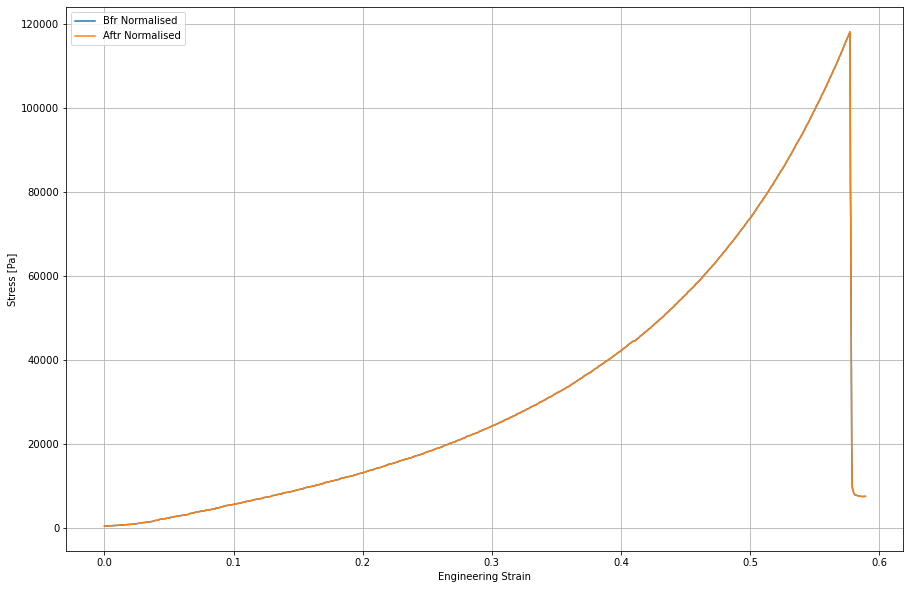

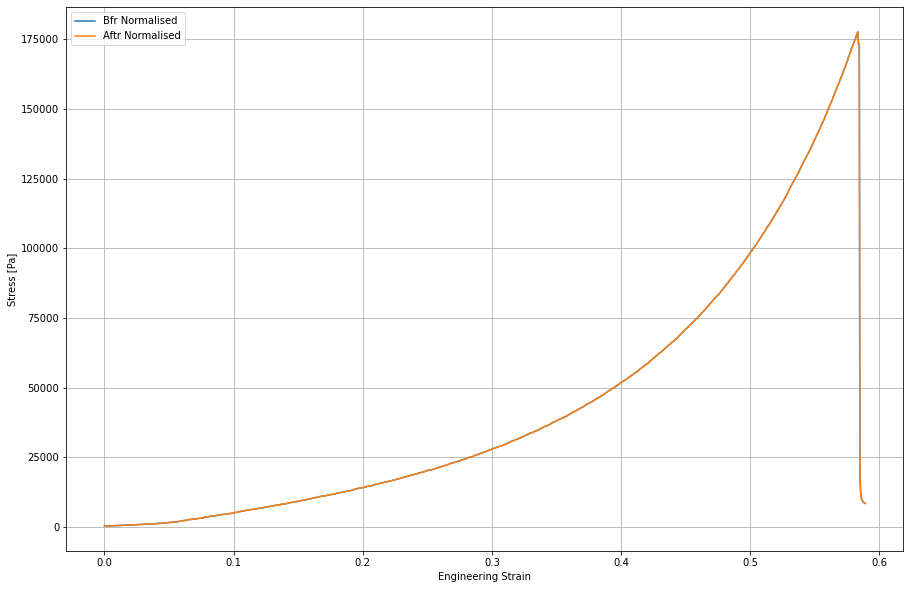

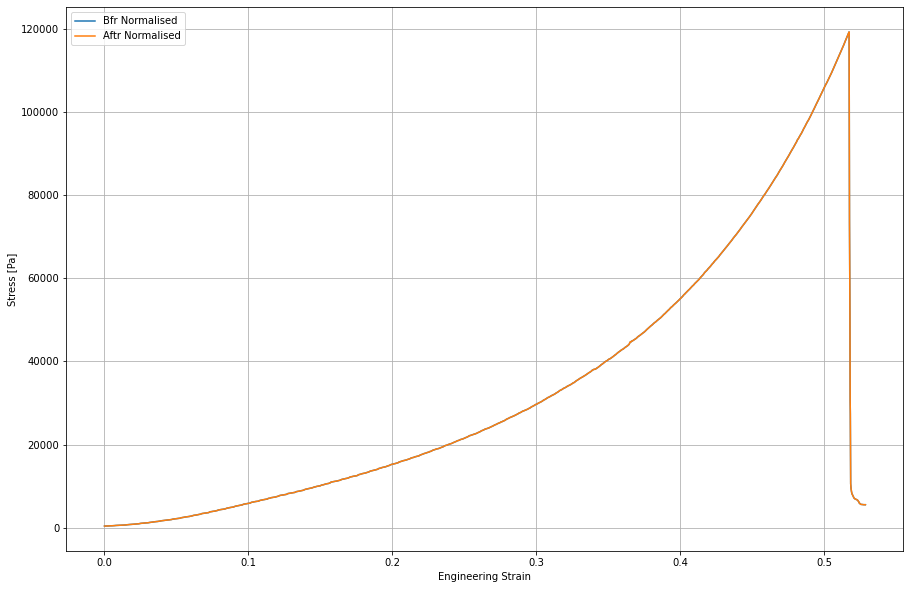

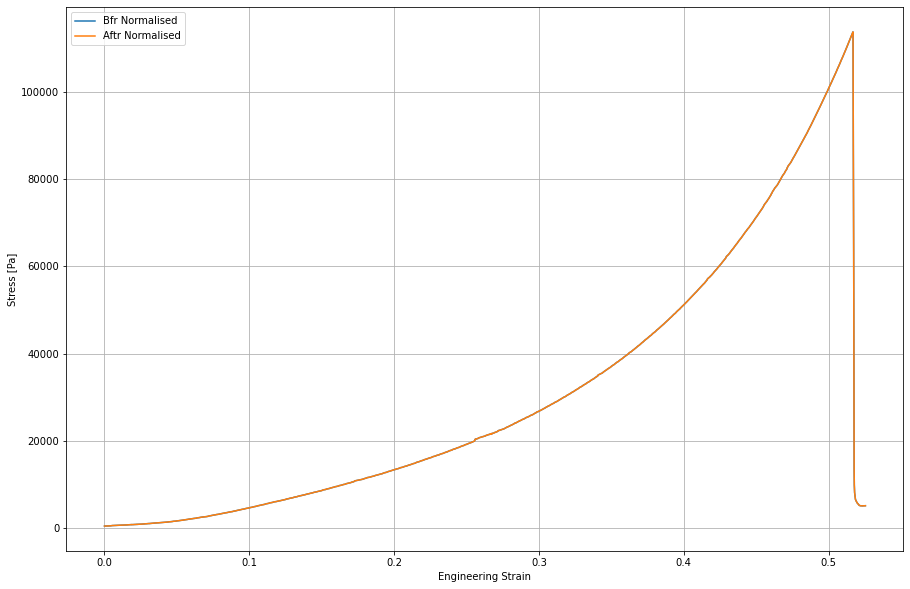

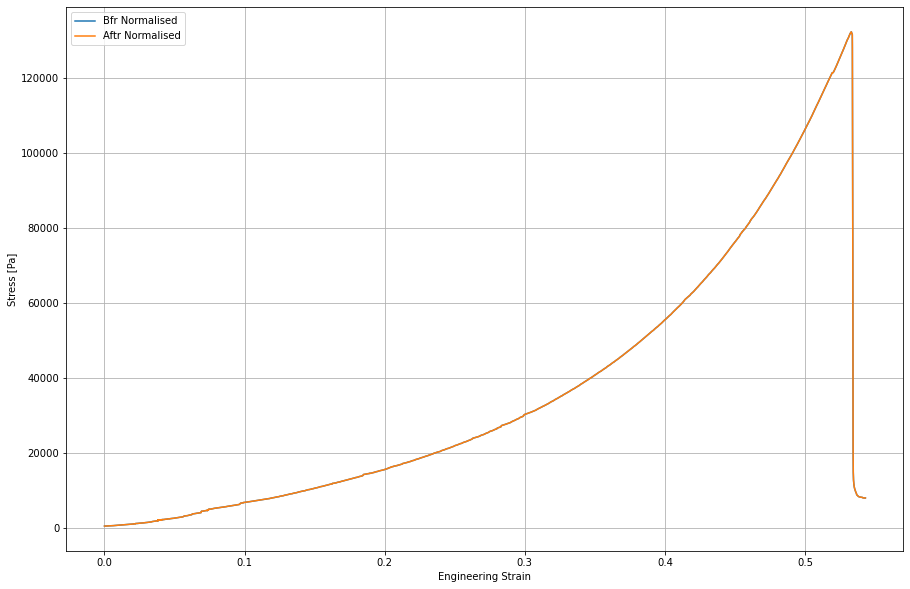

In [31]:
ax = GelMA31_cut_2.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Bfr Normalised', figsize =(15,10))
GelMA31_cut.plot(ax = ax, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Aftr Normalised')
plt.grid()
plt.show()

ax1 = GelMA32_cut_2.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Bfr Normalised', figsize =(15,10))
GelMA32_cut.plot(ax = ax1, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Aftr Normalised')
plt.grid()
plt.show()

ax2 = GelMA33_cut_2.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Bfr Normalised', figsize =(15,10))
GelMA33_cut.plot(ax = ax2, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Aftr Normalised')
plt.grid()
plt.show()

ax3 = GelMA34_cut_2.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Bfr Normalised', figsize =(15,10))
GelMA34_cut.plot(ax = ax3, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Aftr Normalised')
plt.grid()
plt.show()

ax4 = GelMA35_cut_2.plot(y= 'Stress [Pa]', x = 'Strain Normalised', kind = 'line', label = 'Bfr Normalised', figsize =(15,10))
GelMA35_cut.plot(ax = ax4, y = 'Stress [Pa]', ylabel = "Stress [Pa]", x = 'Engineering Strain', label  = 'Aftr Normalised')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()
